# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [3]:
# Read your api key environment variable
load_dotenv("../Desktop/.env")
api_key = os.getenv("NEWS_API")
print(api_key)

9a83284193b9495da07fa993fc7dff37


In [4]:
# Create a newsapi client
from newsapi import NewsApiClient

In [5]:
newsapi = NewsApiClient(api_key=api_key)

In [52]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [53]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [54]:
print(bitcoin_headlines)

{'status': 'ok', 'totalResults': 10233, 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'}, 'author': 'Alex Wilhelm', 'title': 'What Square’s smashing earnings tell us about consumer bitcoin demand', 'description': "Today we're talking Square earnings and its bitcoin base, especially in how it relates to the results of other entities that offer bitcoin sales.", 'url': 'http://techcrunch.com/2021/05/07/what-squares-smashing-earnings-tell-us-about-consumer-bitcoin-demand/', 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/05/NSussman_Techcrunch_Exchange_v3-ORNG.jpg?w=533', 'publishedAt': '2021-05-07T18:17:36Z', 'content': 'Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]'}, {'source': {'id': 'techcrunch', 'name': 'TechCrunch'}, 'author': 'Rebecca Bellan', 'title': 'Tesla sees bitcoin as important

In [55]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in bitcoin_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError: # if there is an error pass
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.0,0.942
1,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.0,1.000
2,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829
3,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.0,1.000
4,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.0,0.865


In [56]:
type(results)

dict

In [57]:
# Create the ethereum sentiment scores DataFrame
sentiments = []

for articles in ethereum_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778
1,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829
2,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.00,0.966
3,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.00,1.000
4,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.00,0.909


In [58]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.221960,0.061850,0.010300,0.927900
std,0.308283,0.068863,0.025375,0.076463
min,-0.381800,0.000000,0.000000,0.777000
25%,0.000000,0.000000,0.000000,0.857000
50%,0.160900,0.046000,0.000000,0.939000
75%,0.360375,0.119250,0.000000,1.000000
max,0.750600,0.179000,0.080000,1.000000


In [59]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.123015,0.043650,0.011200,0.945150
std,0.304172,0.059984,0.036611,0.071036
min,-0.401900,0.000000,0.000000,0.778000
25%,0.000000,0.000000,0.000000,0.924000
50%,0.000000,0.017000,0.000000,0.964000
75%,0.289900,0.066000,0.000000,1.000000
max,0.817600,0.210000,0.150000,1.000000


### Questions:

**Important note:** The sample answers may vary depending on when this code is running since news may change over time.

Q: Which coin had the highest mean positive score?

A: Bitcoin had the marginally higher mean positive score.

Q: Which coin had the highest compound score?

A: Bitcoin had the higher compound mean score, but Ethereum had the higher compound max score.

Q. Which coin had the highest positive score?

A: Ethereum had the higher Positive max score.

---

## 2. Natural Language Processing
---
###   Tokenize

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word,
2. Remove punctuation.
3. Remove stopwords.

In [60]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [61]:
# Instantiate the lemmatizer (nltk)
wnl = WordNetLemmatizer() 

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [62]:
print(stop)

{'that', 'than', 'very', 'few', 'd', 'couldn', 'when', 'each', 'y', 'haven', "haven't", "shouldn't", 'by', 'are', 'such', "it'", 'what', 'these', '\\`', 'just', 'was', "aren't", 'under', 'against', 'can', 'its', 'am', 'into', 'me', 'does', 'ourselves', 'shan', 'during', 'as', 'hadn', "weren't", 'her', 'shouldn', "hadn't", 'all', 'him', 'only', 'which', 'hasn', 'more', 'our', 'u', 'why', "you'd", 'too', 'it', 'their', "you've", 'those', '…', 'after', 'wouldn', 'herself', "you're", 'down', 'a', 'himself', 'until', 'o', 'there', 'yourself', 'in', 'his', 'or', '``', 'you', "wouldn't", "couldn't", 'm', "she's", 'be', 'themselves', 'most', "won't", 'where', 'they', 'to', "mustn't", 'same', 'hers', 'not', 'ain', 'being', 'for', 'mightn', 'any', "n't", 'has', 'at', 'ours', 'here', "'s", 'char', 'again', 'with', 'yours', 'theirs', 'who', 'off', 'about', "it's", 'aren', 'doesn', 've', 'ma', 'out', 'had', "don't", "should've", "shan't", 'once', "''", 'this', "that'll", "mightn't", 'if', 'needn', 

In [63]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens


In [64]:
# Create a new tokens column for Bitcoin
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.0,0.942,"[Shares, Square, 6, today, American, fintech, ..."
1,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.0,1.000,"[Tesla, ’, relationship, bitcoin, dalliance, a..."
2,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829,"[Cryptocurrency, continues, gain, mainstream, ..."
3,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.0,1.000,"[Cryptocurrency, price, continued, tumble, Fri..."
4,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.0,0.865,"[crypto, industry, whole, seen, momentous, yea..."


In [65]:
# Create a new tokens column for Ethereum
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778,"[investor, call, disruptive, innovator, Detrac..."
1,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829,"[Cryptocurrency, continues, gain, mainstream, ..."
2,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.00,0.966,"[Venmo, jumping, aboard, cryptocurrency, bandw..."
3,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.00,1.000,"[New, York, CNN, Business, Bitcoin, price, con..."
4,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.00,0.909,"[creator, behind, CryptoPunks, one, popular, N..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [66]:
from collections import Counter
from nltk import ngrams

In [67]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'Reuters'), 6),
 (('Reuters', 'Staff'), 6),
 (('char', 'Cryptocurrency'), 2),
 (('Venmo', 'app'), 2),
 (('price', 'continued'), 2),
 (('Jack', 'Dorsey'), 2),
 (('Inc', 'major'), 2),
 (('major', 'bitcoin'), 2),
 (('bitcoin', 'corporate'), 2),
 (('corporate', 'backer'), 2),
 (('backer', 'said'), 2),
 (('said', 'Monday'), 2),
 (('Monday', 'non-employee'), 2),
 (('non-employee', 'director'), 2),
 (('director', 'get'), 2),
 (('get', 'fee'), 2),
 (('fee', 'service'), 2),
 (('service', 'bitcoin'), 2),
 (('bitcoin', 'instead'), 2),
 (('instead', 'cash'), 2)]

In [68]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'Reuters'), 4),
 (('Reuters', 'Staff'), 4),
 (('representation', 'virtual'), 4),
 (('virtual', 'currency'), 4),
 (('currency', 'Ethereum'), 4),
 (('Ethereum', 'seen'), 4),
 (('seen', 'front'), 4),
 (('front', 'stock'), 4),
 (('stock', 'graph'), 4),
 (('graph', 'illustration'), 4),
 (('illustration', 'taken'), 4),
 (('taken', 'February'), 4),
 (('February', '19'), 4),
 (('19', '2021'), 4),
 (('2021', 'REUTERS/Dado'), 4),
 (('ether', 'hit'), 3),
 (('hit', 'record'), 3),
 (('record', 'high'), 3),
 (('Venmo', 'app'), 2),
 (('Staff', 'FILE'), 2)]

In [69]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [70]:
# Use token_count to get the top 10 words for Bitcoin
top_bitcoin_tokens = tokenizer(btc.text.str.cat())
token_count(top_bitcoin_tokens, 10)

[('char', 20),
 ('Reuters', 11),
 ('Bitcoin', 9),
 ('bitcoin', 7),
 ('Staff', 6),
 ('Tesla', 5),
 ('cryptocurrency', 5),
 ('price', 4),
 ('today', 3),
 ('2021', 3)]

In [71]:
# Use token_count to get the top 10 words for Ethereum
top_ethereum_tokens = tokenizer(eth.text.str.cat())
token_count(top_ethereum_tokens, 10)

[('char', 20),
 ('Ethereum', 7),
 ('Reuters', 6),
 ('currency', 6),
 ('stock', 5),
 ('project', 4),
 ('crypto', 4),
 ('Staff', 4),
 ('representation', 4),
 ('virtual', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [73]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='Blues').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

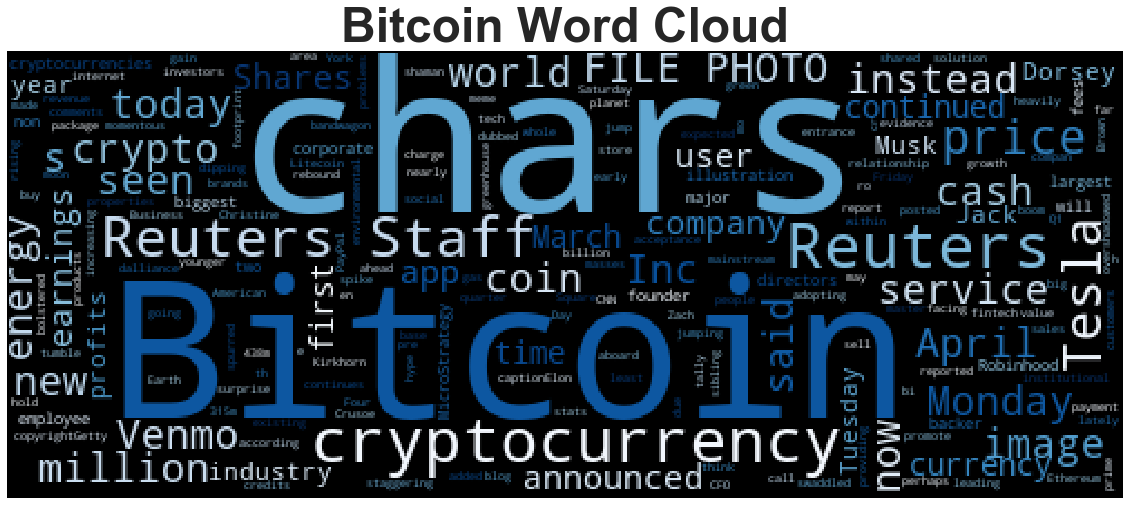

In [74]:
wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

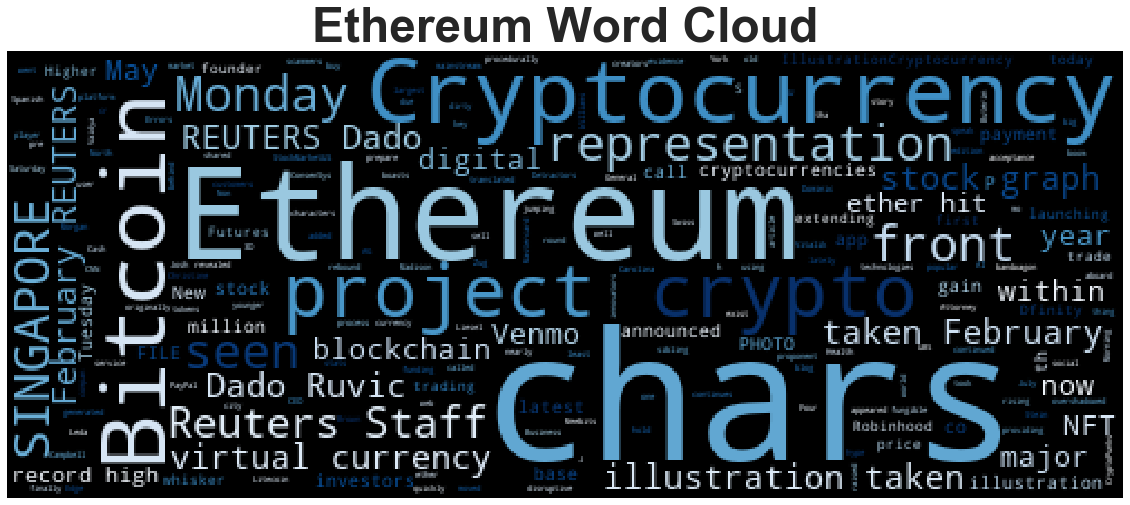

In [75]:
wordcloud(eth.text.str.cat(), title="Ethereum Word Cloud")

---

## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [76]:
import spacy
from spacy import displacy

In [77]:
# Download the language model for SpaCy if needed
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.7 MB 3.6 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [78]:
# Load the spaCy model
NER_ = spacy.load('en_core_web_sm')

---

## Bitcoin NER

In [79]:
# Concatenate all of the bitcoin text together
all_btc_text = btc.text.str.cat()
all_btc_text

'Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]Tesla’s relationship with bitcoin is not a dalliance, according to the comments made by the company’s CFO and dubbed “master of coin” Zach Kirkhorn during an earnings call Monday. Instead, the compan… [+3073 chars]Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]Cryptocurrency prices continued to tumble Friday with Bitcoin leading the charge, with prices for the internet currency dipping below $50,000 for the first time since early March.\r\nBitcoin is down ro… [+1222 chars]The crypto industry as a whole has seen a momentous year of growth, heavily spurred on by the entrance of institutional investors adopting bi

In [80]:
# Run the NER processor on all of the text
doc = NER_(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [81]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [82]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
CFO ORG
Zach Kirkhorn PERSON
Monday DATE
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
a momentous year DATE
2020 DATE
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
Jack Dorsey PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
chars]New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
two CARDINAL
Crusoe Energy ORG
two CARDINAL
today DATE
Dogecoin GPE
Reuters ORG
April 12 DATE
Reuters ORG
Monday DATE
Dorsey PERSON
Twitter PRODUCT
Wednesday DATE
Elon Musk PERSON
BBC ORG
Kuber PERSON
India GPE
Thursday DATE
$25 million MONEY
Indi GPE
Reuters ORG
Santa Clarita GPE
California G

---

### Ethereum NER

In [83]:
# Concatenate all of the bitcoin text together
all_eth_text = eth.text.str.cat()
all_eth_text

'Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars]Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]Venmo is jumping aboard the cryptocurrency bandwagon.\xa0\r\nThe social payment service announced on Tuesday that its customers can now buy, hold, and sell cryptocurrencies within the Venmo app.\xa0\r\nFour cr… [+1524 chars]New York (CNN Business)Bitcoin prices continued their rebound Saturday, rising about 6% to nearly $58,000. But the world\'s largest cryptocurrency has been overshadowed lately by its younger sibling, … [+866 chars]The creators behind CryptoPunks, one of the most popular NFT projects on the web, just revealed their latest project called Meebits. 

In [84]:
# Run the NER processor on all of the text
eth_doc = NER_(all_eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [85]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [86]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

North Carolina GPE
Josh Stein PERSON
Madison Campbell PERSON
Liesel Vaidya PERSON
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Tuesday DATE
Venmo PERSON
Four CARDINAL
chars]New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
CryptoPunks ORG
one CARDINAL
NFT ORG
Meebits PRODUCT
20,000 CARDINAL
3D ORG
Ethereum ORG
$65 million MONEY
J.P. Morgan PERSON
Mastercard PERSON
UBS AG ORG
Reuters ORG
February 19, 2021 DATE
SINGAPORE GPE
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Dfinity ORG
July 2018 DATE
Swiss NORP
Dominic Williams PERSON
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
StockMarketUS Stock Futures Edge Higher ORG
Monday DATE
U.S. GPE
Monday DATE
Spanish NORP
AI ORG
Cryptocurrencies ORG
today DATE
Vitalik Buterin PERSON
27-year-old DATE
Topps GPE
first ORDINAL
NFT ORG
Dow Jones Indices ORG
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurren